# Yodapy Bio-acoustic Sonar Data Example

## Inilization

To access the OOI API, credentials need to be set. In order to set this up, switch to the python environment that contains yodapy and then fire up python.

```bash
$ python
```

Within the python console, set your credentials.

```python
from yodapy.utils.creds import set_credentials_file
set_credentials_file(data_source='ooi', username='Your OOI username', token='Your OOI token')
```

The initialization step places a special .yodapy/.credentials file in your home directory. Your ~/.yodapy/.credentials file should look something like this

```json
{"ooi": {"username": "Your OOI username", "api_key": "Your OOI token"}}
```

## Getting started with yodapy

First we need to import all the necessary packages to retrieve and visualize Bio-acoustic sonar data from OOI. `yodapy` provides easy access to OOI by having an easy to use interface to search through available data in OOI system and retrieve the data in the form of xarray dataset.

In [1]:
from yodapy.datasources import OOI
import matplotlib.pyplot as plt

`OOI` class contains all of the functions to search, request, and retrieve data from OOI

In [2]:
ooi = OOI()

In [3]:
ooi.search('coastal endurance,cabled', stream_method='streamed', stream='zplsc_echogram_data')

<Data Source: OOI (2 Instrument Streams)>

In [4]:
ooi.instruments

,array_name,site_name,infrastructure_name,instrument_name,stream_method,stream_rd
0,Coastal Endurance,Oregon Offshore Cabled Shallow Profiler Mooring,200m Platform (PC01B),Bio-acoustic Sonar (Coastal),streamed,zplsc_echogram_data
1,Coastal Endurance,Oregon Shelf Cabled Benthic Experiment Package,Medium-Power JBox (MJ01C),Bio-acoustic Sonar (Coastal),streamed,zplsc_echogram_data


In this example, start time and end time has been set to the 2017 Solar eclipse

In [5]:
start_time = '2017-08-21T06:000'
end_time = '2017-08-22T07:0000'

In [6]:
ooi.request_data(start_time, end_time)

15:17:47  downloading: OOI-D20170821-T073706.raw
15:17:52  downloading: OOI-D20170821-T112536.raw
15:17:56  downloading: OOI-D20170821-T151406.raw
15:18:00  downloading: OOI-D20170821-T190235.raw
15:18:06  downloading: OOI-D20170821-T225105.raw
15:18:09  downloading: OOI-D20170822-T000000.raw
15:18:14  downloading: OOI-D20170822-T034834.raw
15:18:18  downloading: OOI-D20170821-T063618.raw
15:18:24  downloading: OOI-D20170821-T081522.raw
15:18:36  downloading: OOI-D20170821-T095435.raw
15:18:41  downloading: OOI-D20170821-T113343.raw
15:18:46  downloading: OOI-D20170821-T131245.raw
15:18:52  downloading: OOI-D20170821-T145147.raw
15:18:58  downloading: OOI-D20170821-T163049.raw
15:19:03  downloading: OOI-D20170821-T180952.raw
15:19:07  downloading: OOI-D20170821-T194853.raw
15:19:12  downloading: OOI-D20170821-T212802.raw
15:19:16  downloading: OOI-D20170821-T230706.raw
15:19:20  downloading: OOI-D20170822-T000000.raw
15:19:24  downloading: OOI-D20170822-T013902.raw
15:19:29  downloadin

<Data Source: OOI (2 Instrument Streams)>

In [7]:
ds_list = ooi.to_xarray()

15:22:51  converting file: OOI-D20170821-T073706.raw
15:22:55  saving calibrated Sv to /home/lsetiawan/.yodapy/ooi/CE02SHBP-MJ01C-07-ZPLSCB101-streamed-zplsc_echogram_data/OOI-D20170821-T073706_Sv.nc
15:23:04  saving denoised Sv to /home/lsetiawan/.yodapy/ooi/CE02SHBP-MJ01C-07-ZPLSCB101-streamed-zplsc_echogram_data/OOI-D20170821-T073706_Sv_clean.nc
15:23:05  saving MVBS to /home/lsetiawan/.yodapy/ooi/CE02SHBP-MJ01C-07-ZPLSCB101-streamed-zplsc_echogram_data/OOI-D20170821-T073706_MVBS.nc
15:23:05  cleaning up: /home/lsetiawan/.yodapy/ooi/CE02SHBP-MJ01C-07-ZPLSCB101-streamed-zplsc_echogram_data/OOI-D20170821-T073706.nc
15:23:05  cleaning up: /home/lsetiawan/.yodapy/ooi/CE02SHBP-MJ01C-07-ZPLSCB101-streamed-zplsc_echogram_data/OOI-D20170821-T073706_Sv.nc
15:23:05  cleaning up: /home/lsetiawan/.yodapy/ooi/CE02SHBP-MJ01C-07-ZPLSCB101-streamed-zplsc_echogram_data/OOI-D20170821-T073706_Sv_clean.nc
15:23:05  converting file: OOI-D20170821-T112536.raw
15:23:09  saving calibrated Sv to /home/lseti

The result of the request is a list of xarray datasets

In [8]:
ds_list

[<xarray.Dataset>
 Dimensions:                   (frequency: 3, ping_time: 2864, range_bin: 18)
 Coordinates:
   * frequency                 (frequency) float32 120000.0 38000.0 200000.0
   * range_bin                 (range_bin) int64 0 26 52 78 ... 364 390 416 442
   * ping_time                 (ping_time) datetime64[ns] 2017-08-21T07:37:06.129140736 ... 2017-08-22T07:36:46.228403200
 Data variables:
     MVBS                      (frequency, ping_time, range_bin) float64 dask.array<shape=(3, 2864, 18), chunksize=(3, 456, 18)>
     noise_est_range_bin_size  (ping_time, frequency) float32 dask.array<shape=(2864, 3), chunksize=(456, 3)>
     sample_thickness          (ping_time, frequency) float32 dask.array<shape=(2864, 3), chunksize=(456, 3)>
 Attributes:
     noise_est_ping_size:  30
     id:                   CE02SHBP-MJ01C-07-ZPLSCB101-streamed-zplsc_echogram...,
 <xarray.Dataset>
 Dimensions:                   (frequency: 3, ping_time: 3066, range_bin: 42)
 Coordinates:
   * freq

In this step, the echograms are visualized.

CE02SHBP-MJ01C-07-ZPLSCB101-streamed-zplsc_echogram_data


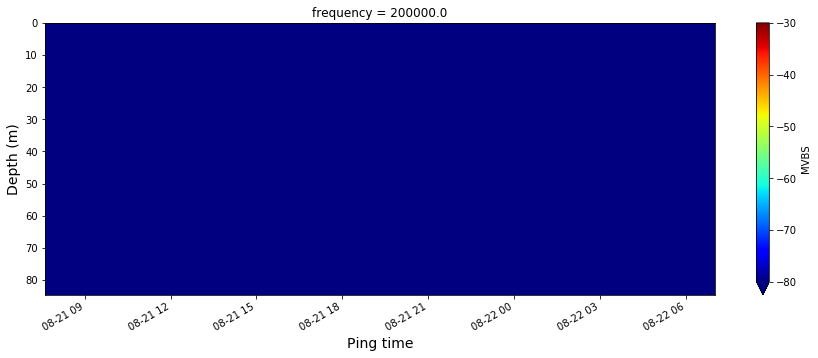

CE04OSPS-PC01B-05-ZPLSCB102-streamed-zplsc_echogram_data


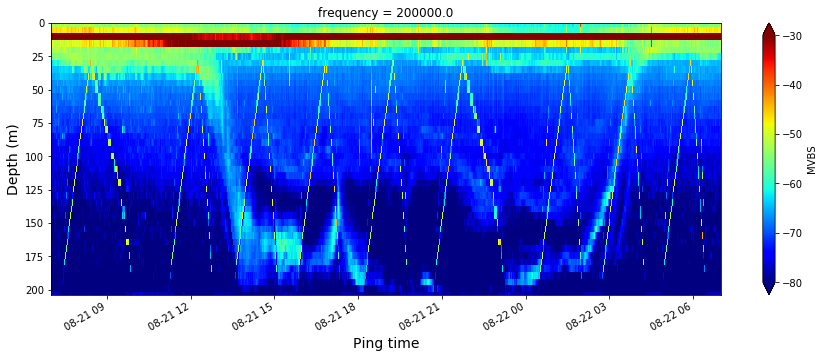

In [9]:
for res in ds_list:
    print(res.attrs['id'])
    res.coords['depth'] = res.range_bin * res.sample_thickness.isel(frequency=1).isel(ping_time=0).values
    res.coords['depth'] = res.coords['depth'].max() - res.coords['depth']
    echogram = res.MVBS.isel(frequency=2).\
            sel(ping_time=slice('2017-08-21 07:00:00',
                                '2017-08-22 07:00:00')).\
            plot(x='ping_time',y='depth',cmap='jet',
                 vmin=-80,vmax=-30, aspect=3, size=5)
    plt.ylim(res.coords['depth'].max(), 0)
    plt.xlabel('Ping time', fontsize=14)
    plt.ylabel('Depth (m)', fontsize=14)
    plt.show()